In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
# 1. Load data
df = pd.read_csv(r"C:\Users\Raksh\Downloads\bank.csv", sep=';')

In [ ]:
# 2. Clean & map target
df = df.dropna()
df['target_bin'] = df['y'].map({'yes':1, 'no':0})

In [ ]:
# 3. Corrected categorical columns (use 'day' instead of 'day_of_week')
cat_cols = [
    'job','marital','education','contact',
    'poutcome','month','day','default','housing','loan'
]

In [ ]:
# 4. Apply one-hot encoding to the categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [ ]:
# 5. Define features and drop unusable columns
X = df.drop(['y','target_bin','duration'], axis=1, errors='ignore')
y = df['target_bin']


In [ ]:
# 6. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 7. Train the decision tree with balanced class weights and pruning
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)


In [ ]:
# 7. Train the decision tree with balanced class weights and pruning
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)


In [ ]:
# 8. Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))


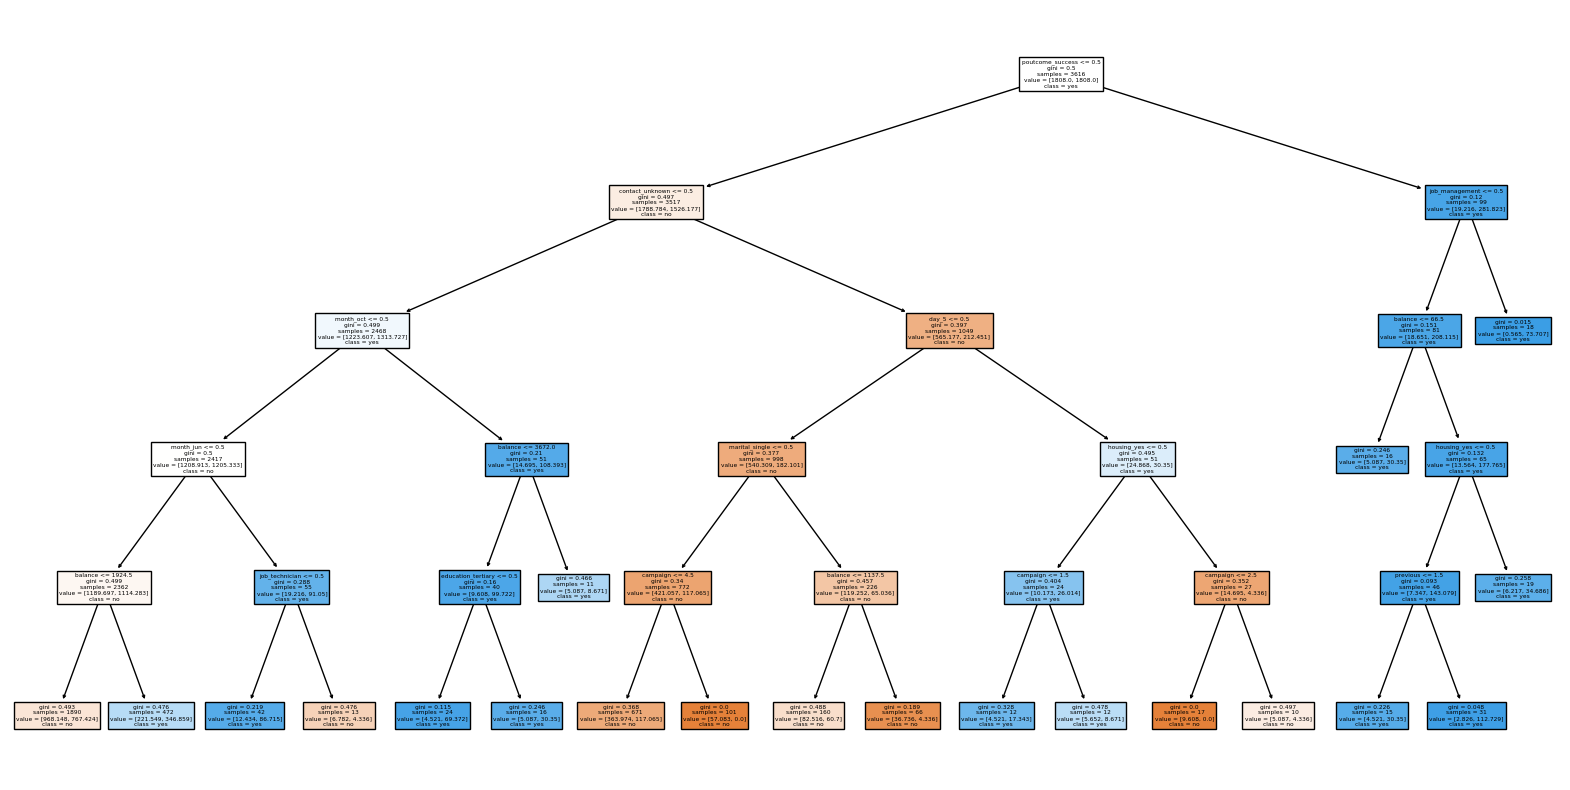

In [4]:

# 9. Plot the tree
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['no','yes'],
    filled=True
)
plt.show()